In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
#%matplotlib tk  
%matplotlib inline

### 데이터 불러오기, null 값 삭제, 분석컬럼 추출, 연속형 -> 범주형으로 데이터 타입 변경

In [20]:
df_JCN = pd.read_csv('../../../dataset/Join Collection NSC2_BND_M20.csv')
df_JCN.head(2)

,Unnamed: 0,ED_RC_TOT_AMT,MCARE_SUBJ_CD,OPRTN_YN,MCARE_RSLT_TYPE,EDC_SBA,BTH_YYYY
0,0,7570,1,0,5.0,3000,1921LE
1,1,18160,1,0,5.0,6000,1921LE


In [21]:
df_JCN = df_JCN.dropna()

In [22]:
df_JCN.isnull().sum()

Unnamed: 0         0
ED_RC_TOT_AMT      0
MCARE_SUBJ_CD      0
OPRTN_YN           0
MCARE_RSLT_TYPE    0
EDC_SBA            0
BTH_YYYY           0
dtype: int64

In [23]:
df_JCN_SKY = df_JCN[['ED_RC_TOT_AMT','MCARE_SUBJ_CD','OPRTN_YN','MCARE_RSLT_TYPE']]
df_JCN_SKY[:2]

,ED_RC_TOT_AMT,MCARE_SUBJ_CD,OPRTN_YN,MCARE_RSLT_TYPE
0,7570,1,0,5.0
1,18160,1,0,5.0


In [24]:
df_JCN_SKY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4205 entries, 0 to 4628
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ED_RC_TOT_AMT    4205 non-null   int64  
 1   MCARE_SUBJ_CD    4205 non-null   int64  
 2   OPRTN_YN         4205 non-null   int64  
 3   MCARE_RSLT_TYPE  4205 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 164.3 KB


In [25]:
df_JCN_SKY[['MCARE_SUBJ_CD','OPRTN_YN','MCARE_RSLT_TYPE']] = df_JCN_SKY[['MCARE_SUBJ_CD','OPRTN_YN','MCARE_RSLT_TYPE']].astype(str)

C:\Users\02-19\AppData\Local\Temp\ipykernel_15308\2275312239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JCN_SKY[['MCARE_SUBJ_CD','OPRTN_YN','MCARE_RSLT_TYPE']] = df_JCN_SKY[['MCARE_SUBJ_CD','OPRTN_YN','MCARE_RSLT_TYPE']].astype(str)


In [26]:
df_JCN_SKY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4205 entries, 0 to 4628
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ED_RC_TOT_AMT    4205 non-null   int64 
 1   MCARE_SUBJ_CD    4205 non-null   object
 2   OPRTN_YN         4205 non-null   object
 3   MCARE_RSLT_TYPE  4205 non-null   object
dtypes: int64(1), object(3)
memory usage: 164.3+ KB


## 상관관계 확인
- 목표변수 : ED_RC_TOT_AMT(요양급여비용총액)
  - 연속형일 경우 : 정규화 확인
  - 범주형일 경우 : 밸런스 여부 확인
  
- 설명 변수 :
  - 'MCARE_SUBJ_CD(진료과목코드)' : '사무직','무직','자영업'을 가진 직업군이 입원기간이 상대적으로 길다.  
  - 'OPRTN_YN(수술여부)' : 당뇨를 가지고 있는 환자의 입원기간이 상대적으로 길다.
  - 'MCARE_RSLT_TYPE(진료결과구분)' : 심혈관질을 가지고 있는 환자는 입원기간이 상대적으로 길다.

- 분석 story : 

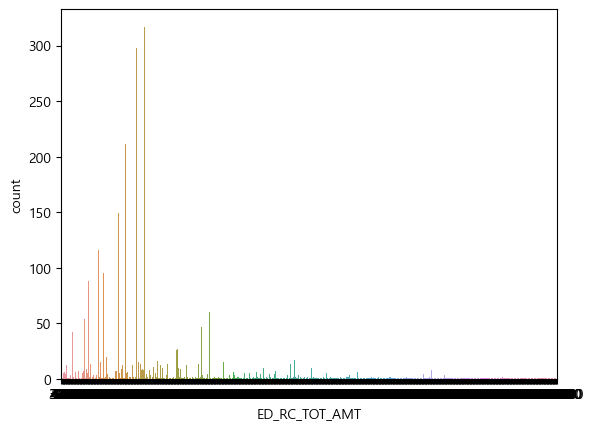

In [27]:
sns.countplot(data=df_JCN_SKY, x='ED_RC_TOT_AMT')
plt.show()

### X: 범주형 / Y : 연속형

In [28]:
forpatient_object_list= df_JCN_SKY.describe(include=object).columns.to_list()
forpatient_object_list

['MCARE_SUBJ_CD', 'OPRTN_YN', 'MCARE_RSLT_TYPE']

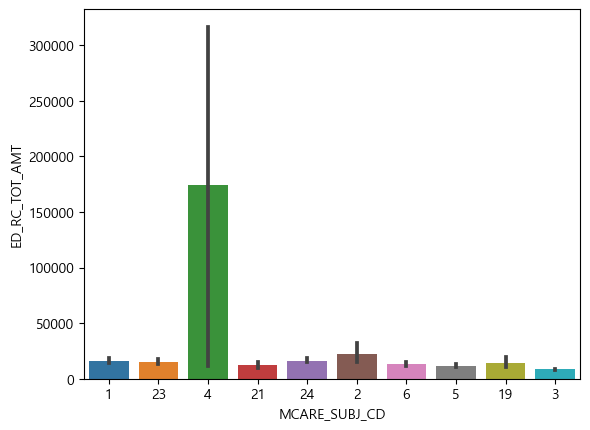

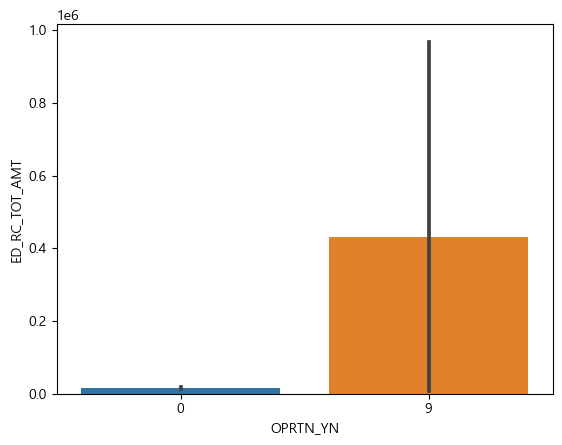

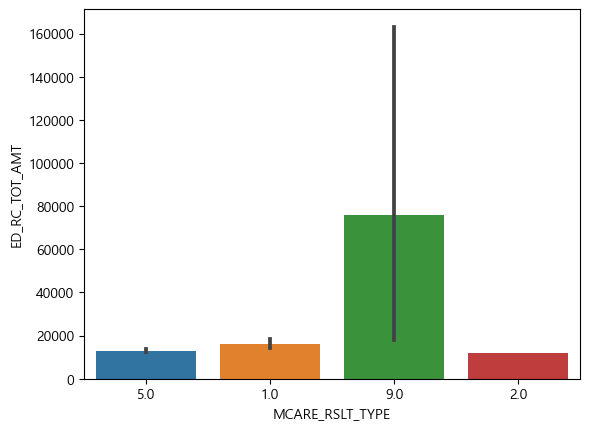

In [29]:
for item in forpatient_object_list :
    sns.barplot(data=df_JCN_SKY, x=item, y='ED_RC_TOT_AMT')
    plt.show()

### 요양급여비용총액이 높은 진료과목코드 TOP3 뽑아내기

In [30]:
df_JCN_SKY_top = pd.pivot_table(data=df_JCN_SKY, index='MCARE_SUBJ_CD', values='ED_RC_TOT_AMT', aggfunc='sum' ) #총합으로 요약
df_JCN_SKY_top_list = df_JCN_SKY_top .sort_values(by='ED_RC_TOT_AMT', ascending=False).iloc[:3].index.to_list()
df_JCN_SKY_top_list

['1', '23', '5']

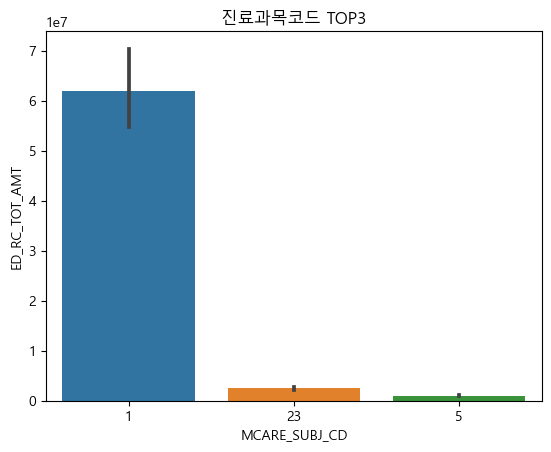

In [31]:
sns.barplot(data=df_JCN_SKY, x='MCARE_SUBJ_CD', y='ED_RC_TOT_AMT', estimator=sum, order=df_JCN_SKY_top_list) 
plt.title("진료과목코드 TOP3")
plt.show()

# 1= 내과, 23 = 가정의학과, 5 = 정형외과